In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '..')
from rowrectifier.rowrectifier import RowRectifier

# Load an image and rectify with polygon matching

Text(0.5, 1.0, '4. Rectified result')

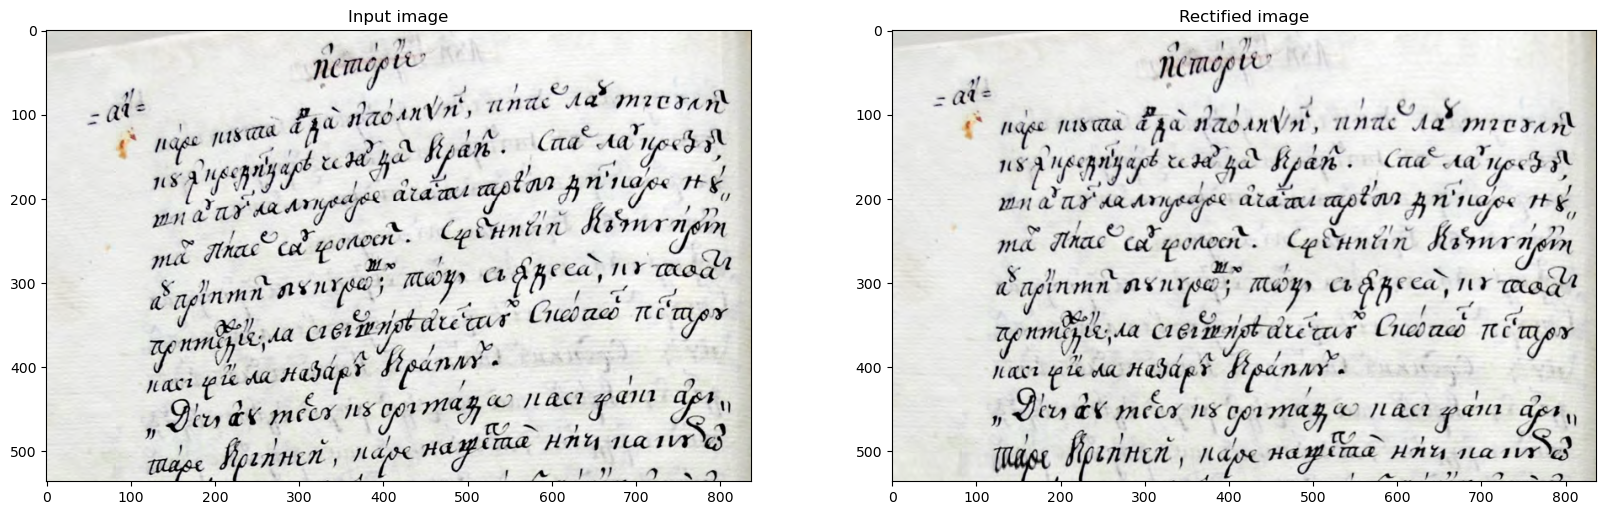

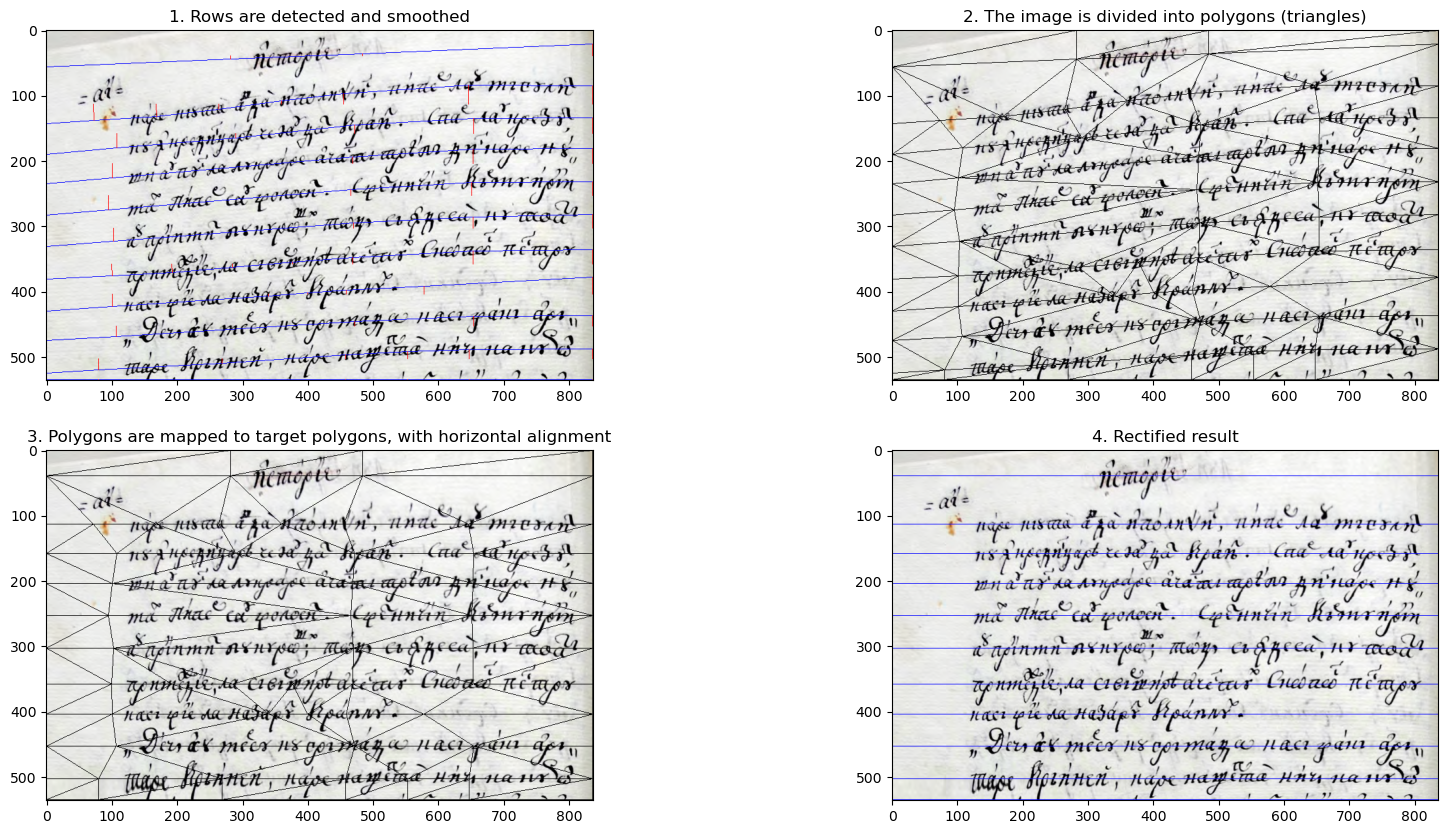

In [2]:
# Load image
I = plt.imread("../samples/Rows.png")

# Rectify
rr = RowRectifier(method="poly", smoothing_method='univariate_spline', s=None, n_poly_sides=3)
rr.fit(I)
Iout1, Isrc_polys, Isrc_ridges, Idst_polys, Idst_ridges = rr.transform(I, return_intermediates=True)

# Plot input and output
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(I)
plt.title("Input image")
plt.subplot(1, 2, 2)
plt.imshow(Iout1)
plt.title("Rectified image")

# Plot intermediate figs
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.imshow(Isrc_ridges/255)
plt.title("1. Rows are detected and smoothed")
plt.subplot(2, 2, 2)
plt.imshow(Isrc_polys/255)
plt.title("2. The image is divided into polygons (triangles)")
plt.subplot(2, 2, 3)
plt.imshow(Idst_polys/255)
plt.title("3. Polygons are mapped to target polygons, with horizontal alignment")
plt.subplot(2, 2, 4)
plt.imshow(Idst_ridges/255)
plt.title("4. Rectified result")


# Rectify with spline approximation and remapping

/home/ncleju/micromamba/envs/rowslinear/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:1324: UserWarning: 
The required storage space exceeds the available storage space: nxest
or nyest too small, or s too small.
The weighted least-squares spline corresponds to the current set of
knots.
  warnings.warn(message)


Text(0.5, 1.0, '4. Rectified result')

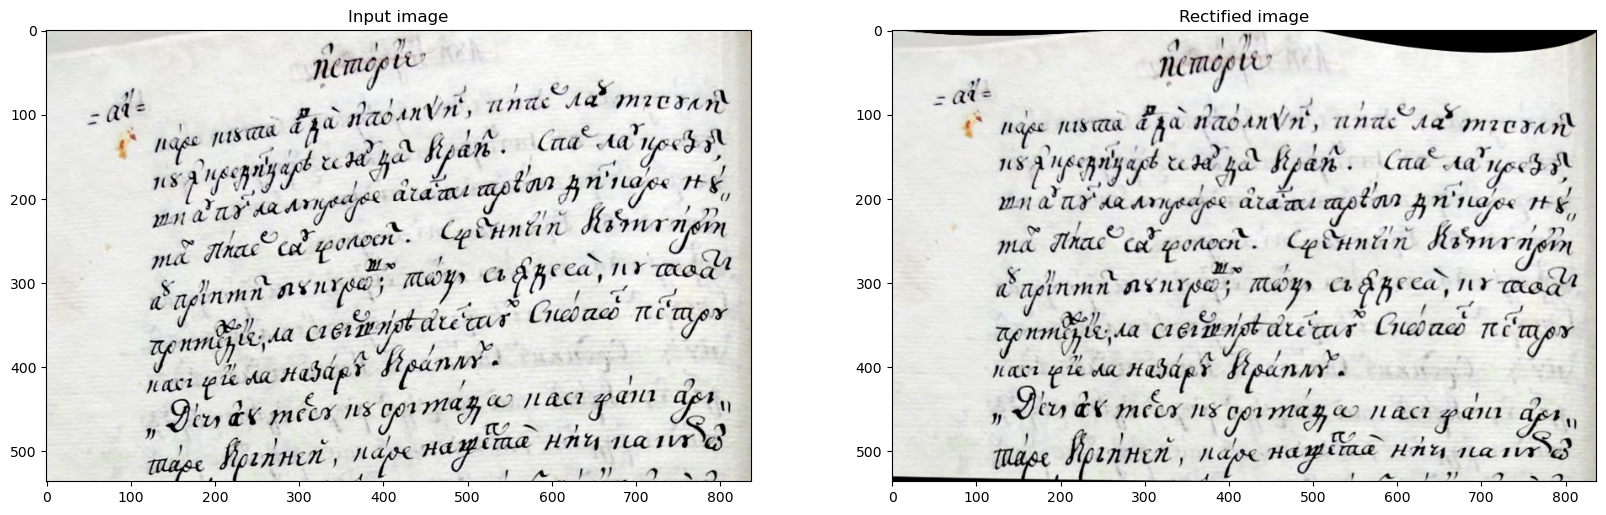

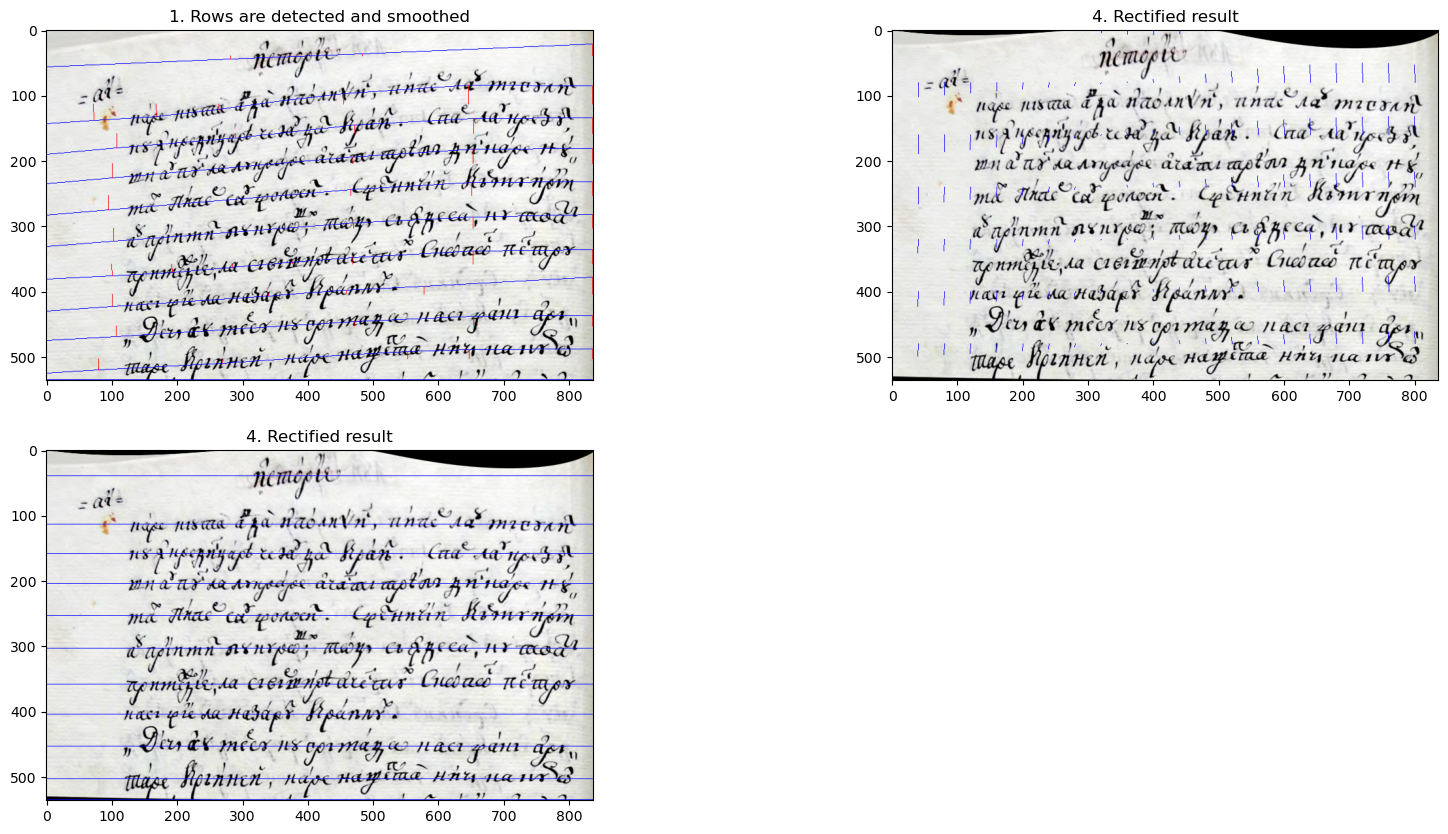

In [2]:
# Load image
I = plt.imread("../samples/Rows.png")

# Rectify
rr = RowRectifier(method="map", smoothing_method="univariate_spline", delta=False)
rr.fit(I)
Iout2, Isrc_ridges, Idst_ridges, Idispl = rr.transform(I, return_intermediates=True)

# Plot input and output
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(I)
plt.title("Input image")
plt.subplot(1, 2, 2)
plt.imshow(Iout2)
plt.title("Rectified image")

# Plot intermediate figs
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.imshow(Isrc_ridges/255)
plt.title("1. Rows are detected and smoothed")
plt.subplot(2, 2, 2)
plt.imshow(Idispl/255)
plt.title("2. Spline approximation of displacement")
plt.subplot(2, 2, 3)
plt.imshow(Idst_ridges/255)
plt.title("3. Rectified result")


# Comparison

In [ ]:
plt.figure()
plt.imshow(I)
plt.title("Original")
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(Iout1)
plt.title("Rectification with polygons")
plt.subplot(1, 2, 2)
plt.imshow(Iout2)
plt.title("Rectification with splines")
